#**BANK MARKETING: Predicting Customer Will Subscribe To FD**

#**Project Description**

---

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

#**Importing Required Libraries**

In [ ]:
# Importing necessary libraries >>

# For dealing with Dataframe >>
import pandas as pd
# For Dealing with Calculations >>
import numpy as np
# For dealing with Graphs >>
import matplotlib.pyplot as plt
import seaborn as sns

#**Load the Data**

In [ ]:
# Load the dataset into df variable >>
train_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

# Exlclude ID Column not required >>
train_df.drop(['ID'],axis=1,inplace=True)
test_df.drop(['ID'],axis=1,inplace=True)

#**Explore the Data**

In [ ]:
# Make all columns & rows of dataset as max to display >>
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lets look at top  Rows of Dataset >>
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
# Lets look at top  Rows of Dataset >>
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [ ]:
# Check the Shape of train Dataset >>
print("-"*70)
print("[$] Rows Of Dataset >> ",train_df.shape[0])
print("[$] Columns Of Dataset >> ",train_df.shape[1])
print("-"*70)

# Check the Shape of test Dataset >>
print("[$] Rows Of Dataset >> ",test_df.shape[0])
print("[$] Columns Of Dataset >> ",test_df.shape[1])
print("-"*70)

----------------------------------------------------------------------
[$] Rows Of Dataset >>  31647
[$] Columns Of Dataset >>  17
----------------------------------------------------------------------
[$] Rows Of Dataset >>  13564
[$] Columns Of Dataset >>  16
----------------------------------------------------------------------


In [ ]:
# Information of Dataset >> to get information about Columns & thier datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [ ]:
# Check for missin values or Null values >>
print("[$] Null Values >> ",train_df.isnull().sum().sum())

[$] Null Values >>  0


In [ ]:
# Get statistical distribution of the dataset >>
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


#**Exploratory Data Analysis**

In [ ]:
Categorical_columns = train_df.select_dtypes(include=['object']).columns
Numerical_Columns = train_df.select_dtypes(include=['int64']).columns

In [ ]:
print("[$] Categorical Columns >> ",Categorical_columns.tolist())
print("[$] Numerical Columns >> ",Numerical_Columns.tolist())d

[$] Categorical Columns >>  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
[$] Numerical Columns >>  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


#**Categorical Variable Analysis**

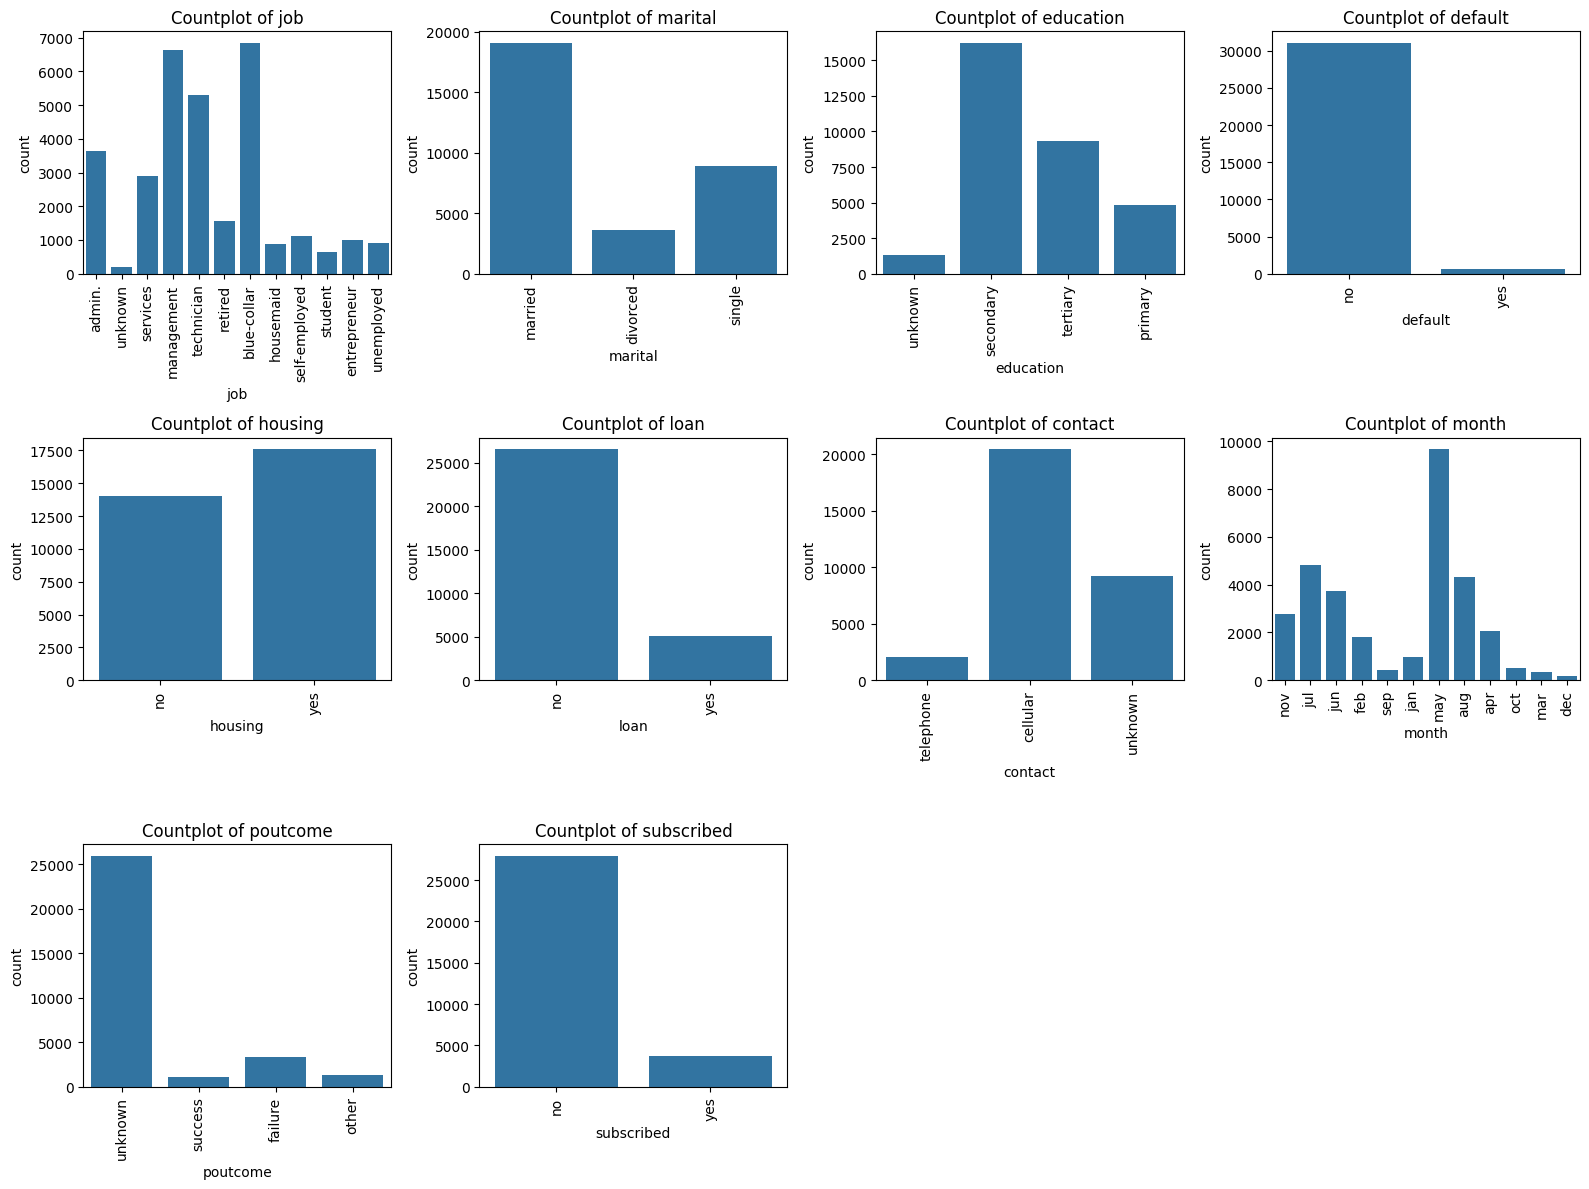

In [ ]:
num_rows = 3
num_cols = len(Categorical_columns) // num_rows + (len(Categorical_columns) % num_rows > 0)

# EDA using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4*num_cols, 4*num_rows))

for i, column in enumerate(Categorical_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.countplot(data=train_df, x=column, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Countplot of {column}')
    axes[row_index, col_index].tick_params(axis='x', rotation=90)

# If there are empty subplots, remove their axes
for i in range(len(Categorical_columns), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

#**Numerical Variable Analysis**

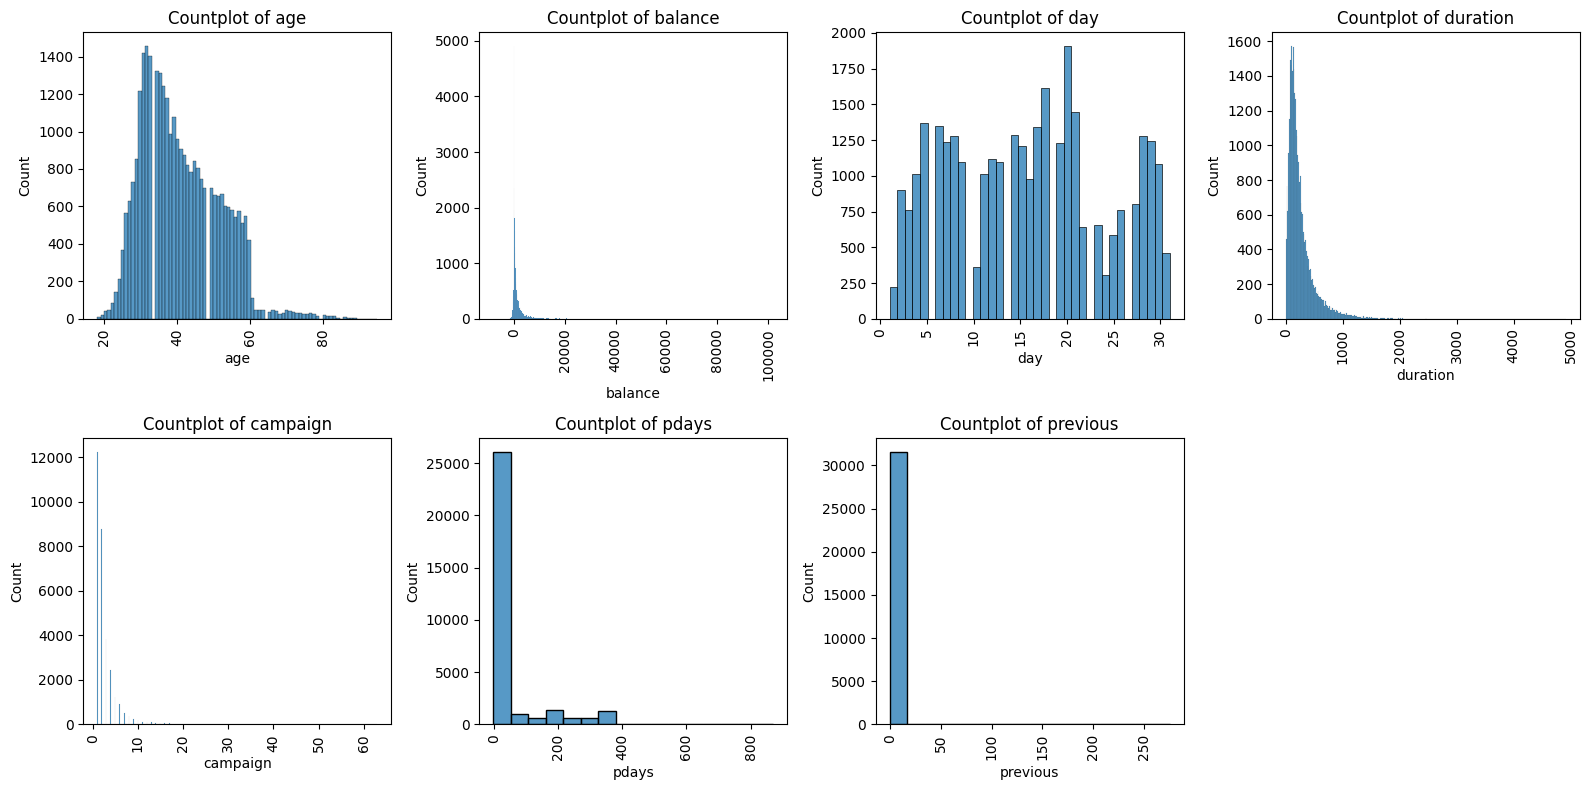

In [ ]:
num_rows = 2
num_cols = len(Numerical_Columns) // num_rows + (len(Numerical_Columns) % num_rows > 0)

# EDA using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(4*num_cols, 4*num_rows))

for i, column in enumerate(Numerical_Columns):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.histplot(data=train_df, x=column, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Countplot of {column}')
    axes[row_index, col_index].tick_params(axis='x', rotation=90)

# If there are empty subplots, remove their axes
for i in range(len(Numerical_Columns), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

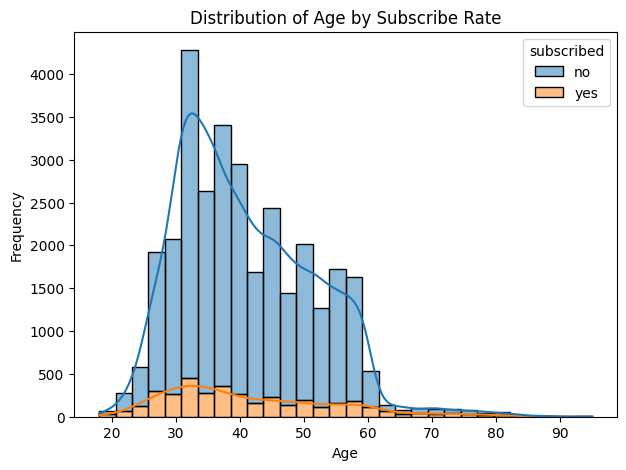

In [ ]:
# Distribution of Age by Attrition
plt.figure(figsize=(7, 5))
sns.histplot(data=train_df, x='age', hue='subscribed', kde=True, multiple='stack', bins=30)
plt.title('Distribution of Age by Subscribe Rate')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

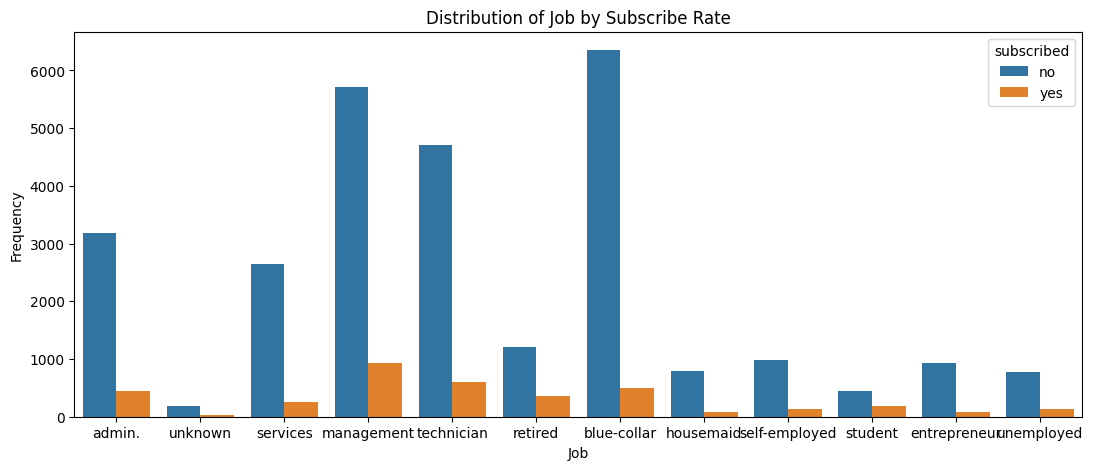

In [ ]:
# Distribution of Job by Subscribed
plt.figure(figsize=(13, 5))
sns.countplot(data=train_df, x='job', hue='subscribed')
plt.title('Distribution of Job by Subscribe Rate')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()

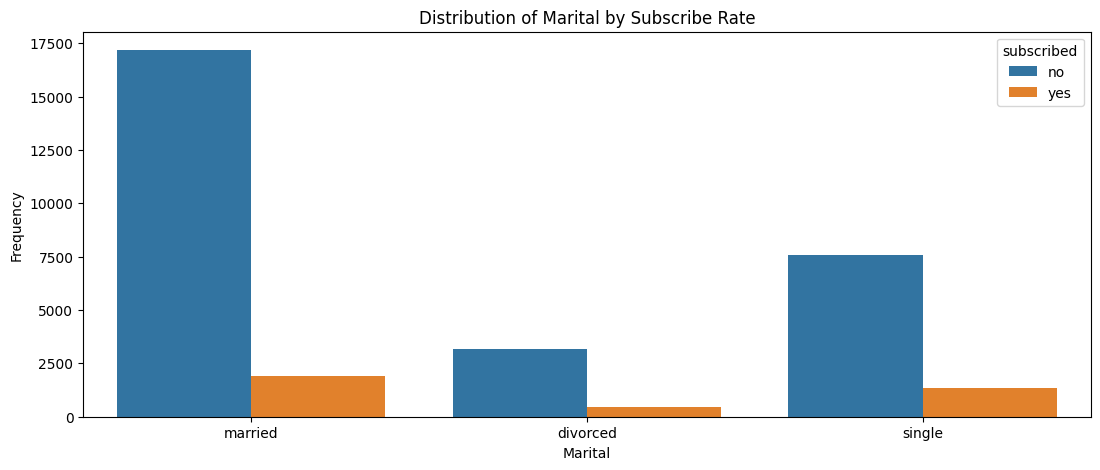

In [ ]:
# Distribution of Marital by Subscribed >>
plt.figure(figsize=(13, 5))
sns.countplot(data=train_df, x='marital', hue='subscribed')
plt.title('Distribution of Marital by Subscribe Rate')
plt.xlabel('Marital')
plt.ylabel('Frequency')
plt.show()

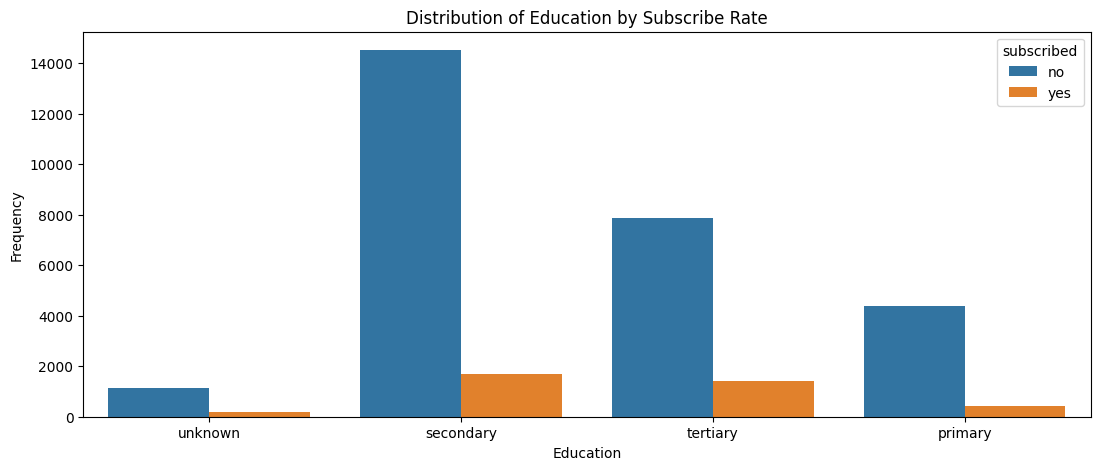

In [ ]:
# Distribution of Education by Subscribed
plt.figure(figsize=(13, 5))
sns.countplot(data=train_df, x='education', hue='subscribed')
plt.title('Distribution of Education by Subscribe Rate')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

#**Data Preprocessing**

In [ ]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Selecting categorical columns >>
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Applying LabelEncoder to each categorical column >>
label_encoders = {}
for column in categorical_columns:
    # Applying labelencoder >>
    label_encoders[column] = LabelEncoder()
    train_df[column] = label_encoders[column].fit_transform(train_df[column])
    test_df[column] = label_encoders[column].transform(test_df[column])

In [ ]:
# >> Checked datatypes
train_df.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
subscribed    object
dtype: object

In [ ]:
# >> Checked datatypes
test_df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
dtype: object

In [ ]:
train_df['subscribed'] = train_df['subscribed'].map({'no': 0, 'yes': 1})

#**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the training data into features and target variable
X_train = train_df.drop(columns=['subscribed'])
y_train = train_df['subscribed']

#### We don't have target feature in Test Dataset so we can't use that

In [ ]:
# Split the testing data into features and target variable

# X_test = test_df.drop(columns=['subscribed'])
# y_test = test_df['subscribed']

# >>> We dont have target feature in test variable so how can we used that ?

In [ ]:
# Split the training data into features and target variable
X = train_df.drop(columns=['subscribed'])
y = train_df['subscribed']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Building**

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
# Train and evaluate models
for name, model in models.items():
    print("-"*70)
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print(f"Accuracy of {name}: {accuracy:.2f}")
    print(f"Classification Report of {name}:\n{report}\n")
print("-"*70)

----------------------------------------------------------------------
Training and evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.89
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5599
           1       0.54      0.19      0.29       731

    accuracy                           0.89      6330
   macro avg       0.72      0.59      0.61      6330
weighted avg       0.86      0.89      0.86      6330


----------------------------------------------------------------------
Training and evaluating Random Forest...
Accuracy of Random Forest: 0.91
Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.64      0.43      0.52       731

    accuracy                           0.91      6330
   macro avg       0.79      0.70      0.73      6330
weighted avg       0.90      0.91      0.90      6330


----------------------------------------------------------------------
Train

Here's a summary of the training and evaluation results for Logistic Regression, Random Forest, and Gradient Boosting algorithms:

---

### Model Evaluation Summary

1. **Logistic Regression**:
   - **Accuracy**: 0.89
   - **Precision**:
     - Class 0: 0.90
     - Class 1: 0.54
   - **Recall**:
     - Class 0: 0.98
     - Class 1: 0.19
   - **F1-score**:
     - Class 0: 0.94
     - Class 1: 0.29
   - **Evaluation**: Logistic Regression achieved an accuracy of 0.89. While it demonstrated high precision and recall for Class 0, it struggled to correctly classify instances of Class 1, resulting in a lower recall and F1-score for that class.

2. **Random Forest**:
   - **Accuracy**: 0.91
   - **Precision**:
     - Class 0: 0.93
     - Class 1: 0.64
   - **Recall**:
     - Class 0: 0.97
     - Class 1: 0.43
   - **F1-score**:
     - Class 0: 0.95
     - Class 1: 0.52
   - **Evaluation**: Random Forest achieved an accuracy of 0.91. It demonstrated higher precision and recall for both classes compared to Logistic Regression, resulting in better overall performance and F1-scores for both classes.

3. **Gradient Boosting**:
   - **Accuracy**: 0.90
   - **Precision**:
     - Class 0: 0.92
     - Class 1: 0.61
   - **Recall**:
     - Class 0: 0.97
     - Class 1: 0.38
   - **F1-score**:
     - Class 0: 0.94
     - Class 1: 0.47
   - **Evaluation**: Gradient Boosting achieved an accuracy of 0.90. It showed similar precision for Class 0 as Random Forest but lower precision for Class 1. Additionally, it demonstrated lower recall and F1-score for Class 1 compared to Random Forest.

### Conclusion

- Among the three models evaluated, Random Forest exhibited the highest accuracy, precision, recall, and F1-scores for both classes.
- Logistic Regression struggled to correctly classify instances of Class 1, resulting in lower recall and F1-score for that class.
- Gradient Boosting showed competitive performance but lagged slightly behind Random Forest in terms of precision, recall, and F1-score for both classes.

Given these results, Random Forest emerges as the preferred choice due to its overall better performance across all evaluation metrics.
